In [3]:
from models import Generator, Cdiscriminator, Qdiscriminator
from features import get_data_loader, get_device, get_checkpoint, train_model
from visualization import show_sample_data, generate_sample

import torch
import os

# Hyperparameters
d_lr = 0.00015
g_lr = 0.0002
num_epochs = 50
batch_size = 32

# Configuration Settings
seed = 111
checkpoint_interval = 5
show_sample = False
load_checkpoint = True

# Set up folders path
script_dir = os.getcwd()
data_folder = os.path.join(script_dir, '..', 'data')
checkpoint_folder = os.path.join(script_dir, 'checkpoints')

# Create required folders
os.makedirs(checkpoint_folder, exist_ok=True)
os.makedirs(data_folder, exist_ok=True)

# Set seed
if seed is not None:
  torch.manual_seed(seed)

# Use cuda if available
device = get_device()

# Load models
generator = Generator().to(device=device)
classical_discriminator = Cdiscriminator()
classical_discriminator = classical_discriminator.to(device=device)
#quantumDiscriminator = Qdiscriminator.to(device=device)

# Load data
train_loader = get_data_loader(batch_size=batch_size, data_folder=data_folder)

# Plot some training samples
if show_sample:
  real_samples, labels = next(iter(train_loader))
  show_sample_data(real_samples, sample_size=16)

# Set up loss function
loss_function = torch.nn.BCELoss()

# Set up optimizers
optimizer_classical_discriminator = torch.optim.Adam(classical_discriminator.parameters(), lr=d_lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=g_lr)

# Load checkpoint
start_epoch = 0
loss_values = None
if load_checkpoint:
  start_epoch, loss_values = get_checkpoint(checkpoint_folder=checkpoint_folder, 
                                            classical_discriminator=classical_discriminator, 
                                            generator=generator, 
                                            optimizer_generator=optimizer_generator, 
                                            optimizer_classical_discriminator=optimizer_classical_discriminator)

Using cuda: NVIDIA GeForce RTX 4060 Laptop GPU
Loading checkpoint from epoch 49


In [3]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
np.size(a)

43189568


6

In [ ]:
# Train model
train_model(device=device, 
            num_epochs=num_epochs,
            train_loader=train_loader,
            generator=generator, 
            classical_discriminator=classical_discriminator, 
            optimizer_generator=optimizer_generator,
            optimizer_classical_discriminator=optimizer_classical_discriminator, 
            loss_function=loss_function,
            checkpoint_folder=checkpoint_folder,
            start_epoch=start_epoch,
            loss_values=loss_values,
            checkpoint_interval=checkpoint_interval) 

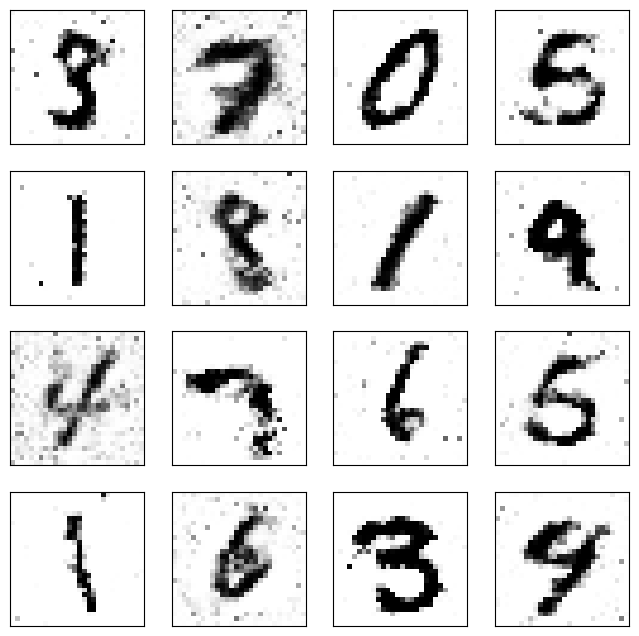

In [58]:
# Generate sample
generate_sample(generator, device, batch_size=16)